# Analise dos dados de reembolso dos senadores - 2018

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('despesa_ceaps_2018.csv', sep=';', encoding='latin1', skiprows=1
                , decimal=',')
df.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2018,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,NaN,02/01/2018,Despesa com pagamento de aluguel de imóvel par...,6000.00,2088462
1,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,M2CJMM,02/01/2018,"Companhia Aérea: AVIANCA, Localizador: M2CJMM....",274.99,2088476
2,2018,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,SFEXYF,02/01/2018,"Companhia Aérea: LATAM, Localizador: SFEXYF. P...",1094.29,2088528


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24492 entries, 0 to 24491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                24492 non-null  int64  
 1   MES                24492 non-null  int64  
 2   SENADOR            24492 non-null  object 
 3   TIPO_DESPESA       24492 non-null  object 
 4   CNPJ_CPF           24492 non-null  object 
 5   FORNECEDOR         24492 non-null  object 
 6   DOCUMENTO          23476 non-null  object 
 7   DATA               24492 non-null  object 
 8   DETALHAMENTO       18882 non-null  object 
 9   VALOR_REEMBOLSADO  24492 non-null  float64
 10  COD_DOCUMENTO      24492 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.1+ MB


In [19]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,24492.0,24492.000000,24492.000000,2.449200e+04
mean,2018.0,6.192226,1045.431215,2.100346e+06
std,0.0,3.305847,2718.840577,7.881637e+03
min,2018.0,1.000000,0.010000,2.085892e+06
25%,2018.0,3.000000,125.000000,2.093630e+06
50%,2018.0,6.000000,287.200000,2.100348e+06
75%,2018.0,9.000000,1032.005000,2.107072e+06
max,2018.0,12.000000,103900.000000,2.118038e+06


In [30]:
#Qual o valor maximo do valor rembolso
df[df['VALOR_REEMBOLSADO'] == df['VALOR_REEMBOLSADO'].max()]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
21225,2018,12,ROSE DE FREITAS,Divulgação da atividade parlamentar,05.461.408/0001-84,Grafitusa S/A,000009681,29/03/2019,NaN,103900.0,2118038


In [32]:
df['VALOR_REEMBOLSADO'].sum()

25604701.33

In [33]:
df['SENADOR'].value_counts()

EDUARDO LOPES          864
PAULO BAUER            824
WELLINGTON FAGUNDES    800
JOSÉ SERRA             715
GLEISI HOFFMANN        653
                      ... 
ALVARO DIAS             40
FERNANDO COLLOR         27
JADER BARBALHO          19
CRISTOVAM BUARQUE       16
ZÉ SANTANA               8
Name: SENADOR, Length: 91, dtype: int64

In [52]:
# Quanto cada senador solicitou de rembolso em 2018
df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).to_frame()

,VALOR_REEMBOLSADO
SENADOR,
EDUARDO BRAGA,529599.18
VANESSA GRAZZIOTIN,515969.63
JOÃO CAPIBERIBE,513333.90
ÂNGELA PORTELA,485806.44
OMAR AZIZ,484143.98
...,...
ALVARO DIAS,44037.88
WALTER PINHEIRO,32733.67
CRISTOVAM BUARQUE,32400.00


In [57]:
#Quais os 5 maiores valores de reembolso
df.nlargest(5, 'VALOR_REEMBOLSADO').T

,21225,21488,21491,22666,5573
ANO,2018,2018,2018,2018,2018
MES,12,11,12,12,12
SENADOR,ROSE DE FREITAS,SÉRGIO PETECÃO,SÉRGIO PETECÃO,VANESSA GRAZZIOTIN,EDUARDO LOPES
TIPO_DESPESA,Divulgação da atividade parlamentar,"Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...","Contratação de consultorias, assessorias, pesq...",Divulgação da atividade parlamentar
CNPJ_CPF,05.461.408/0001-84,22.233.033/0001-14,22.233.033/0001-14,28.916.527/0001-80,14.616.988/0001-22
FORNECEDOR,Grafitusa S/A,Reis Grafica e Comercio de Etiquetas Eireli ME,Reis Grafica e Comercio de Etiquetas Eireli ME,A MAQUINA SOLUCOES EM MIDIA LTDA ME,NG Comunicação Visual Ltda
DOCUMENTO,000009681,4193,000004252,048,00000714
DATA,29/03/2019,29/11/2018,17/12/2018,17/12/2018,05/12/2018
DETALHAMENTO,NaN,NaN,NaN,TRABALHOS TÉCNICOS DE APOIO AO EXERCICIO DO MA...,NaN
VALOR_REEMBOLSADO,103900,102000,102000,100000,66000


In [58]:
#Quais os 5 menores valores de reembolso 
df.nsmallest(5, 'VALOR_REEMBOLSADO')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
3868,2018,5,DÁRIO BERGER,"Passagens aéreas, aquáticas e terrestres nacio...",02.575.829/0001-48,AVIANCA BRASIL,K5RKJV,29/05/2018,"Companhia Aérea: AVIANCA, Localizador: K5RKJV....",0.01,2098074
10161,2018,3,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,W4UUE7,21/03/2018,"Companhia Aérea: LATAM, Localizador: W4UUE7. P...",0.01,2093494
10191,2018,4,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,ZHV36P,09/03/2018,"Companhia Aérea: GOL, Localizador: ZHV36P. Pas...",0.01,2093484
10196,2018,4,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,W6ZMK3,17/04/2018,"Companhia Aérea: LATAM, Localizador: W6ZMK3. P...",0.01,2112029
10233,2018,5,JORGE VIANA,"Passagens aéreas, aquáticas e terrestres nacio...",33.937.681/0001-78,LATAM,OZALEF,22/05/2018,"Companhia Aérea: LATAM, Localizador: OZALEF. P...",0.01,2100068


In [65]:
# Quantidade de rembolso por tipos de despesas

df['TIPO_DESPESA'].value_counts().to_frame()

,TIPO_DESPESA
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",10147
"Passagens aéreas, aquáticas e terrestres nacionais",5820
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",5042
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",1761
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",928
Divulgação da atividade parlamentar,750
Serviços de Segurança Privada,44


In [67]:
# Quanto foi reembolsado por cada tipo de dispesa
df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).to_frame()

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Passagens aéreas, aquáticas e terrestres nacionais",6335284.94
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",5620092.84
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",5041438.25
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",4966449.41
Divulgação da atividade parlamentar,2568910.24
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",900312.04
Serviços de Segurança Privada,172213.61


In [68]:
despesa_reembolso = df.groupby('TIPO_DESPESA')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='TIPO_DESPESA'>

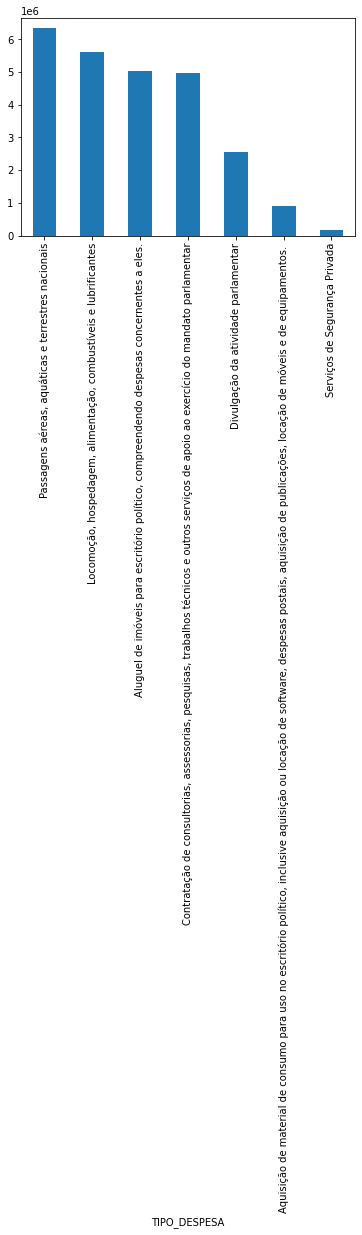

In [69]:
despesa_reembolso.plot.bar()

In [70]:
senores_reembolso = df.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending=False).head(10)

<AxesSubplot:title={'center':'OS 10 senadores com maior Reembolso'}, ylabel='SENADOR'>

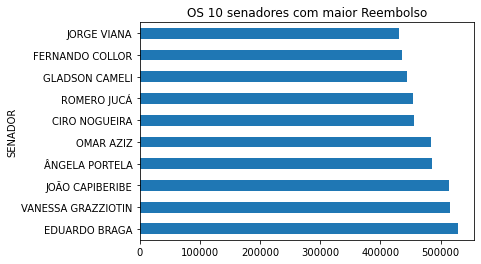

In [74]:
senores_reembolso.plot.barh(title= 'OS 10 senadores com maior Reembolso')